### **Pasos para generar los eventos de Monte Carlo usando MadGraph5, Delphes y Pythia8.**
realizado: Sergio Duque Mejía - 1036654435

Se ejecuta los siguientes pasos despues de ingresar al clustercien y al servidor wn0:
```
$ cd /cms/mc/MG5_aMC_v3_1_1/
$ source /opt/root6/bin/thisroot.sh
$ python2 bin/mg5_aMC
 -------------------------
$ import model UFO
$ generate p p > zp > b b~
$ output PpToZp_BBbar
 -------------------------
$ cd PpToZp_BBbar/Cards/
--------------------------
|-$ nano me5_configuration.txt
    | automatic_html_opening = False
    | run_mode = 2
    | nb_core = None
|-$ nano param_card.dat
    | INFORMATION FOR MASS:
    ---| 5.000000e+01 # MZp
|-$ nano run_card.dat
    | zpTobbar = run_tag
    | 50000 = nevents
    | False = use_syst
---------------------------
$ cd ..
$ python2 bin/madevent
$ launch
$ shower=Pythia8
$ detector=Delphes
```
**Presionar "Enter" 2 veces y esperar que se generen todos los eventos.**
```
$ cd run_01
$ scp ruta/del/archivo/zpTobbar_delphes_events.root ruta/donde/guardar/
```
Para visualizar inicialmente los datos, en la terminal local donde se encuentre el archivo:
```
$ root -l
$ TBrowser b("zpTobbar_delphes_events.root")
```
Tambien se puede realizar un grafico rapido:
```
$ Delphes->Draw("Jet.PT")
```
Para obtener todos los datos que se desean analizar, en formato de pandas Dataframe: Utilizar el codigo de Tomas llamado: CoffeaDelphes.py
Se importa el metodo Converter:
```
from CoffeaDelphes import Converter
```




## Análisis de los Datos

In [1]:
from CoffeaDelphes import Converter
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])


In [3]:
fname = "Zprime_bbbar_M50.root" # archivo .root de eventos generados con Delphes.
tree = Converter(fname) # Generar el objeto tree
events = {"Jet": ["PT", "Eta", "Phi", "Mass", "BTag"],
          "MissingET": ["MET", "Phi"],
          "Muon": ["PT", "Eta", "Phi", "Charge"],
          "Electron": ["PT", "Eta", "Phi", "Charge"]} # generar un diccionario con los eventos que se desean.
tree.generate(events) # ingresar en
data = tree.df

In [4]:
data.head() # Visualizar los datos obtenidos

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,missinget_met,missinget_phi,muon_pt0,muon_eta0,muon_phi0,muon_charge0,electron_pt0,electron_eta0,electron_phi0,electron_charge0
0,62.016109,46.997913,34.228870,30.865467,-0.607084,-3.023663,-2.919088,1.207050,0.009484,-2.999144,...,16.189470,-0.094437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36.520973,30.758999,29.836596,20.442619,0.409347,1.242087,0.613536,-0.510407,1.015780,2.322117,...,3.657078,1.564066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.906301,14.655532,6.070272,5.402434,3.086690,3.324408,3.239179,2.796623,0.245975,-2.627605,...,6.746422,3.017491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.523180,15.212760,9.867399,8.487084,-0.722504,-0.741535,0.054573,-0.742068,-1.187535,2.179609,...,14.231677,0.079118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.747971,15.106291,8.664992,8.586075,1.288282,0.154733,3.127723,2.437404,3.006339,-0.438111,...,18.454487,1.671880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns # Se observa las columnas generadas

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_eta0', 'muon_phi0', 'muon_charge0', 'electron_pt0',
       'electron_eta0', 'electron_phi0', 'electron_charge0'],
      dtype='object')

## Graficas de los Pt(j1,j2,j3,j4)

In [112]:
a = 'jet_eta0'
a[4:-1]

'eta'

In [195]:
def pt_jet(feature,max_range, bin):
    fig = plt.figure(figsize=(8,6))
    box_style=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    text = "n_events: {}".format(data[feature].count())+"\n"+"mean: {}".format(round(data[feature].mean(),2))+"\n" \
            +"sigma: {}".format(round(data[feature].std(),2))
    h = plt.hist(data[feature],bins=bin)
    ax = plt.gca()
    p = ax.patches  
    heights = [patch.get_height() for patch in p]

    try:
        if feature[4:-1] == 'pt': name = '$P_T$'
        elif feature[4:-1] == 'eta': name = '$\eta$'
        elif feature[4:-1] == 'phi': name = '$\phi$'
        plt.title("{} for {}".format(name,feature[:3] + str(int(feature[-1]) + 1)  ))
    except:
        name = feature[-3:]
        plt.title("{} for data".format(str(name).upper()) )
    
    
    
    plt.xlabel("{} [GeV]".format(name))
    plt.ylabel("Eventos")
    plt.text(max_range/2,max(heights)/1.5, text,bbox=box_style)
    plt.xlim(0,max_range)
    plt.show()

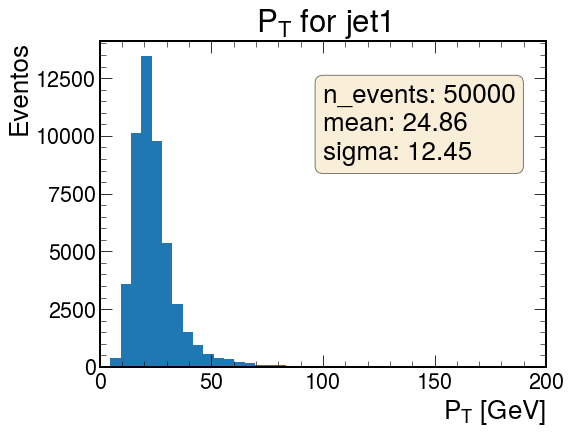

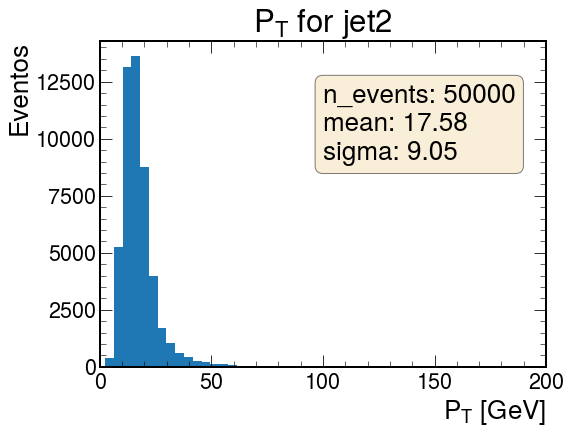

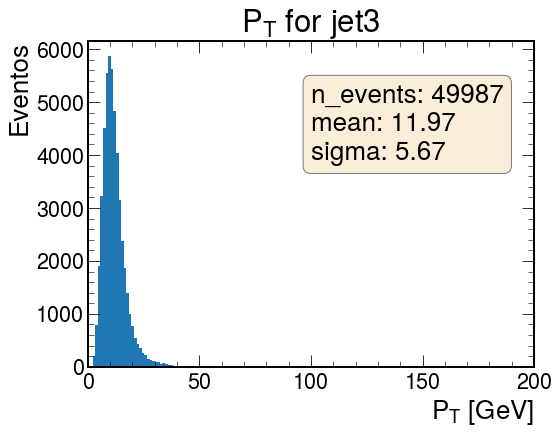

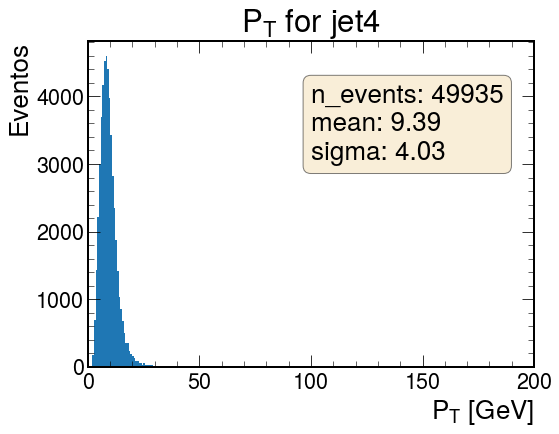

In [196]:
pt_jet('jet_pt0',200,100)
pt_jet('jet_pt1',200,100)
pt_jet('jet_pt2',200,100)
pt_jet('jet_pt3',200,100)

## Graficas de los $\eta$ (j1,j2,j3,j4)

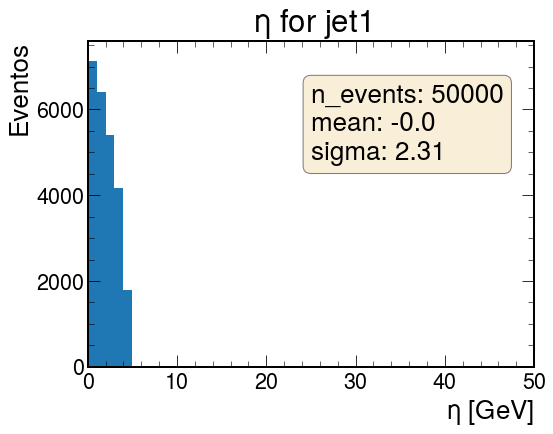

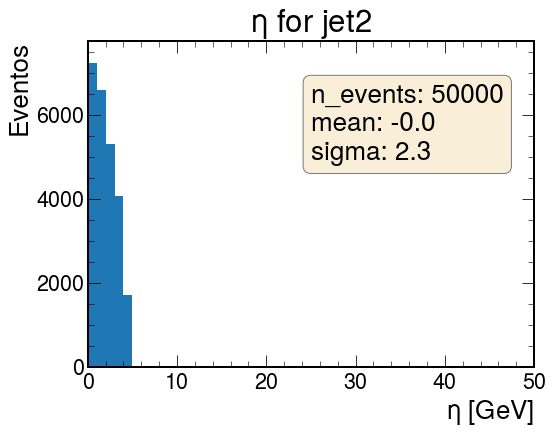

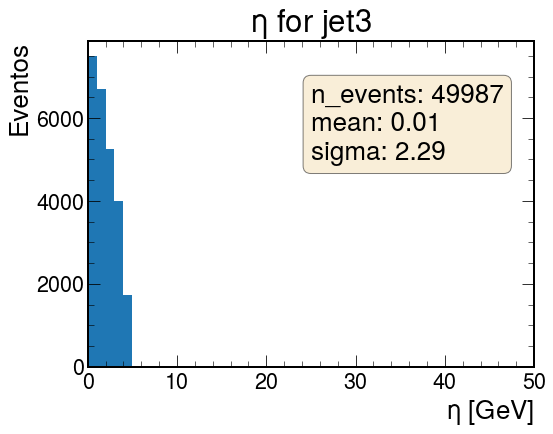

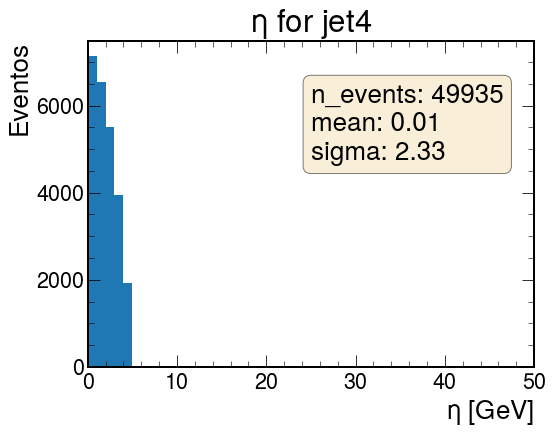

In [197]:
pt_jet('jet_eta0',50,10)
pt_jet('jet_eta1',50,10)
pt_jet('jet_eta2',50,10)
pt_jet('jet_eta3',50,10)

## Graficas de los $\phi$ (j1,j2,j3,j4)

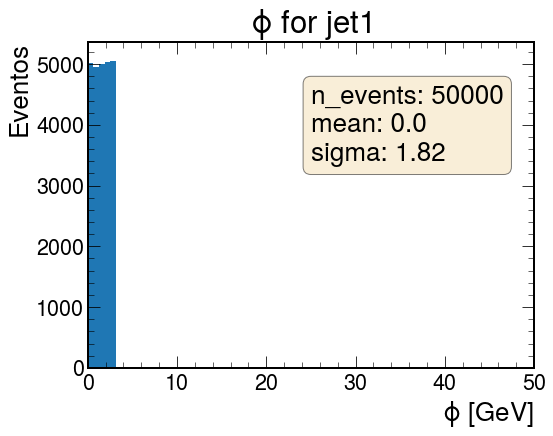

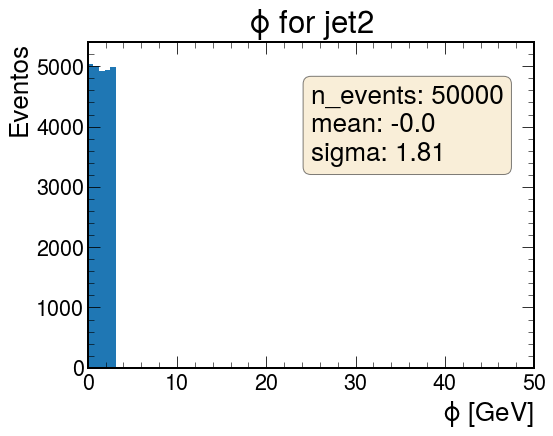

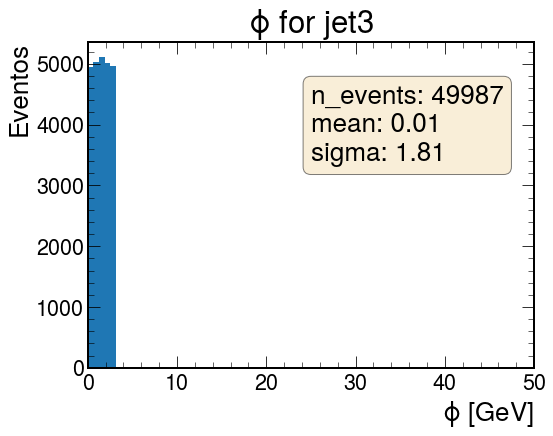

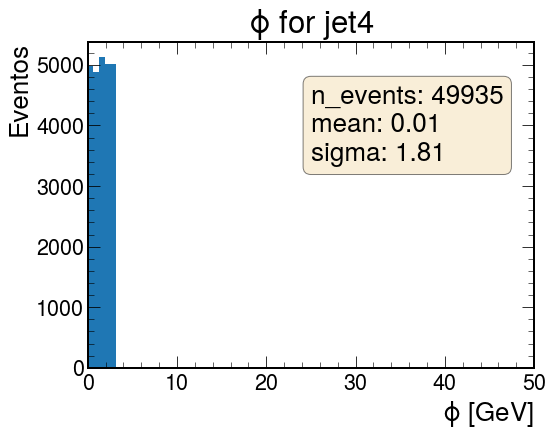

In [198]:
pt_jet('jet_phi0',50,10)
pt_jet('jet_phi1',50,10)
pt_jet('jet_phi2',50,10)
pt_jet('jet_phi3',50,10)

# N(b)

In [163]:
def count_bjets(list_feature):
    sum = 0
    for i in list_feature:
        d = data[i].value_counts()[1]
        print('Numero de bjets en {}: {}'.format(i[4:-1] + str( int(i[-1]) + 1 ),d))
        sum += d
    return sum

In [164]:
l = ['jet_btag0','jet_btag1','jet_btag2','jet_btag3']
print("Numero de bjets TOTAL: ", count_bjets(l))

Numero de bjets en btag1: 15345
Numero de bjets en btag2: 10788
Numero de bjets en btag3: 5151
Numero de bjets en btag4: 3190
Numero de bjets TOTAL:  34474


## MET

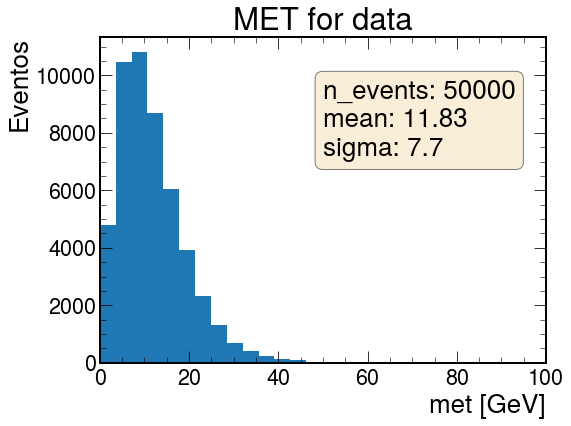

In [199]:
pt_jet('missinget_met',100,50)

## $\Delta \phi$

In [200]:
def DeltaPhi(row, col1, col2 = 'met_Phi'):
    """
    correction on azimuthal angle difference dphi
    """
    dphi = row[col1] - row[col2]
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi(rowa, col1a, col2a = 'met_Phi'):
    return np.abs(DeltaPhi(rowa, col1a, col2a))

## $\Delta R$

In [202]:
def DeltaR(Deta,Dphi):
    return np.sqrt( Deta**2 + Dphi**2 )

# -------------------------

In [201]:
data.columns

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_eta0', 'muon_phi0', 'muon_charge0', 'electron_pt0',
       'electron_eta0', 'electron_phi0', 'electron_charge0'],
      dtype='object')

In [206]:
data1 = data[data['jet_btag0'] == 1.0]

<AxesSubplot:>

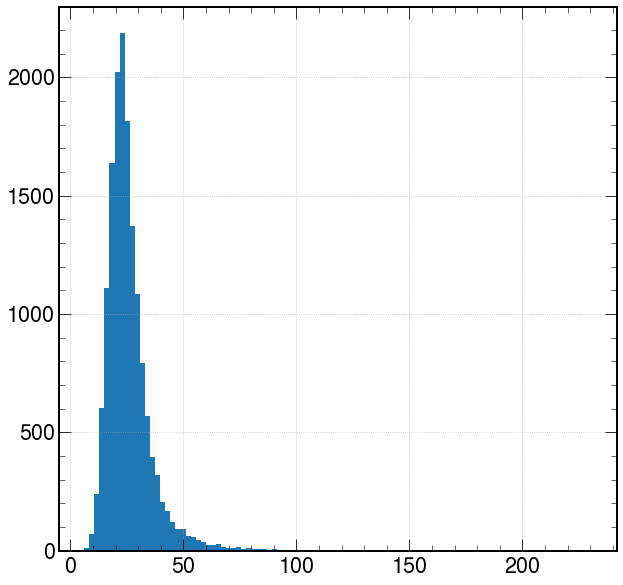

In [210]:
data1['jet_pt0'].hist(bins=100)

## Masa invariante en Colisionadores de particulas:

$\begin{equation}
M^{2} = 2P_{T1}P_{T2}[ cosh(\eta _{1} - \eta _{2}) - cos(\phi _{1} - \phi _{2}) ]
\end{equation}$

In [15]:
# Se definen los pt1,pt2,eta1,eta2,phi1,phi2 de los datos recolectados.
pt1 = data["jet_pt0"].fillna(0)
pt2 = data["jet_pt1"].fillna(0)
eta1 = data["jet_eta0"].fillna(0)
eta2 = data["jet_eta1"].fillna(0)
phi1 = data["jet_phi0"].fillna(0)
phi2 = data["jet_phi1"].fillna(0)

Text(10000, 2, 'n_events: 4975\nmean: 75608.27\nsigma: 162398.05')

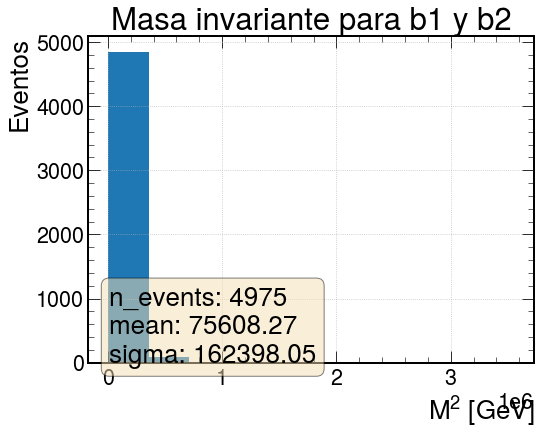

In [16]:
# Se calcula la masa invariante usando la formula.

inv_mass = 2*pt1*pt2*(np.cosh(eta1-eta2) - np.cos(phi1-phi2))
inv_mass = inv_mass.replace(0,np.nan)
text3 = "n_events: {}".format(inv_mass.count())+"\n"+"mean: {}".format(round(inv_mass.mean(),2))+"\n"+"sigma: {}".format(round(inv_mass.std(),2))

ax1 = plt.subplot(111)
inv_mass.hist(figsize=(8,6))
ax1.set_title("Masa invariante para b1 y b2")
ax1.set_xlabel("$M^{2}$ [GeV]")
ax1.set_ylabel("Eventos")
ax1.text(10000,2, text3,bbox=box_style)